# mohamed yaser elsaid 2001226
# yassa siefen ayed 2001307

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data preprocessing
firstly we will explore the data and take in considerations columns we nedd and drop others we don't

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


### it appears that the unamed is indexing so we will drop it 

In [3]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 94.5 KB


In [5]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


### from describe there are some unusual beahviours observed as :
- the min in the diff coulmn is -ve value
- symptom 6 has its percentiles and max equal to each other
- gender have a max of 2

### fristly we explore the diff as it's described in the project statement that it's the time the symptoms appeared so it can't be less than 0

In [6]:
print(df[df['diff_sym_hos'] <0])

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1  \
223        56       18       1  35.0          0           0         6   
240       128       18       1  65.0          0           0         6   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  result  
223        31        19        12         3         1            -1       0  
240        31        19        12         3         1            -5       0  


### next we explore the values of sympotom 6 and the gender

In [7]:
print(df['symptom6'].value_counts())

symptom6
1    862
0      1
Name: count, dtype: int64


#### as can be seen there's only 1 zero so the symptom doesn't effect any model so we will drop it

In [8]:
gender = df['gender'].value_counts()
print(gender)

gender
1    389
0    302
2    172
Name: count, dtype: int64


#### an undefined variable 2  exists with big frequency so that makes it redundant to make sure we will pie plot the percentages

([<matplotlib.patches.Wedge at 0x1aad092fd60>,
 [Text(-0.16950666640350712, -1.0868613021194427, '1'),
  Text(0.7742700740940995, 0.7813487392722392, '0'),
  Text(-0.8913287401236816, 0.6446185515710283, '2')],
 [Text(-0.09245818167464025, -0.592833437519696, '45.08%'),
  Text(0.42232913132405425, 0.42619022142122137, '34.99%'),
  Text(-0.48617931279473536, 0.3516101190387427, '19.93%')])

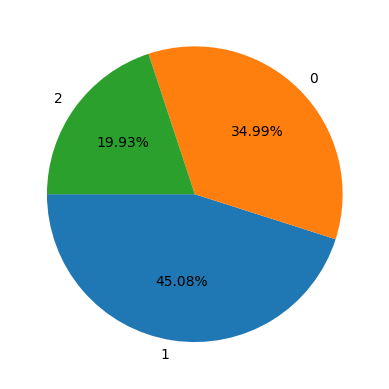

In [9]:
labels=[1,0,2] # as one appeared before 0 in the data
plt.pie(gender,labels=labels,startangle=180,autopct="%2.2f%%")

## we can drop symptom 6 as it doesn't affect the data and gender can be dropped but as instructed that the data is clean so we will keep it

In [10]:
X = df.drop(columns=['result' ,'symptom6'],axis = 1).values #['gender' ,'result','symptom6']
y = df['result'].values

# now we will visualize the data to know how it looks like between the age and time of symptoms showing as they are the most relastic paramters to take decision upon 

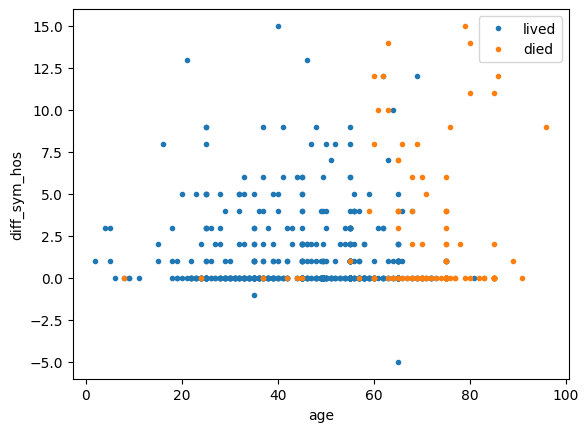

In [60]:
plt.plot(X[y==0,3],X[y==0,-1],'.')
plt.plot(X[y==1,3],X[y==1,-1],'.')
plt.xlabel('age')
plt.ylabel('diff_sym_hos')
plt.legend(['lived','died'])

### it can be seen that above age 60 there's  a high chance of death

## splitting into train and test
- random_state is chosen 42 for recreation

In [13]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

### feautre scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# importing metrics and validations to be used as required

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , auc
from sklearn.metrics import roc_curve , RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
score_idx = ["acc","recall","percision","f1 score","AUC"]
comp={}

## important functions

In [16]:
def scoresmet(y_pred,y_true=y_test):
    res = []
    res +=[accuracy_score(y_true=y_test,y_pred=y_pred)]
    res += [recall_score(y_true=y_test,y_pred=y_pred)]
    res += [precision_score(y_true=y_test,y_pred=y_pred)]
    res += [f1_score(y_true=y_test,y_pred=y_pred)]
    print(f"accuracy score :{res[0]:0.3f} ")
    print(f"recall score :{res[1]:0.3f}     percesion score : {res[2]:0.3f}")
    print(f"f1 score :{res[-1]:0.3f} ")
    return res

In [17]:
def confmat(y_pred,y_true=y_test):
    cm=confusion_matrix(y_pred=y_pred,y_true=y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot()
    plt.show()

In [18]:
def rocgraph(model):
    display = RocCurveDisplay.from_estimator(model,X_test,y_test)
    a = display.roc_auc
    return a ,display

In [19]:
#TODO discover the problem ---- > inconsisitent
def kf_validation(model,scoring,n_splits=10):
    kf = KFold(n_splits=n_splits,random_state=42)
    best_model = None
    best_rec = 0.0
    methods = {"acc":accuracy_score,
               "rec":recall_score,
               "pre":precision_score}
    score = methods[scoring]
    records=[]
    for tr_idx ,test_idx in kf.split(X_train) :

        ## splitting to train and validation
        xtr,xte=X_train[tr_idx],X_train[test_idx]
        ytr,yte=y_train[tr_idx],y_train[test_idx]

        #training
        classifier_k = model
        print(score)
        classifier_k.fit(xtr,ytr)

        #testing
        y_hat = classifier_k.predict(xte)

        #recording and choosing best model
        records+=[score(y_pred=y_hat,y_true=yte)]
        if records[-1] > best_rec :
            best_rec = records[-1]
            best_model = classifier_k
        
    print(f"best {scoring} :{best_rec} ")
    print(f"avg {scoring} : {np.mean(records)}")
    return best_model
    
    

### after searching we found we can do dimensionality reduction to draw a decision boundary

In [20]:
from sklearn.decomposition import PCA

In [21]:
def decision_boundary(model) :
    pca = PCA(n_components=2)
    X_test_pca = pca.fit_transform(X_test)
    h = .02  # step size in the mesh
    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain predictions for each point in the meshgrid
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

    # Reshape the predictions for contour plotting
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)

    # Scatter plot of training data points
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.RdYlBu)

    plt.title('Decision Boundary Visualization using PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# KNN

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#####################################################

# pipelining StandardScaler() & KNeighborsClassifier()
knn = KNeighborsClassifier()
#knn_model.fit(X_train, y_train)
steps = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(steps)

In [23]:
from sklearn.model_selection import GridSearchCV
k_values = list(range(1,25))
param_grid = {'knn__n_neighbors': k_values}
cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24]},
             scoring='accuracy')

In [24]:
# best K accorading to accuracy score
cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [25]:
scores = cv_classifier.cv_results_['mean_test_score']
scores

array([0.93043478, 0.92318841, 0.92608696, 0.92028986, 0.92173913,
       0.9115942 , 0.92318841, 0.91884058, 0.92173913, 0.9115942 ,
       0.91884058, 0.91594203, 0.91884058, 0.91014493, 0.9115942 ,
       0.90289855, 0.90869565, 0.89275362, 0.89710145, 0.8942029 ,
       0.89565217, 0.89130435, 0.89275362, 0.88695652])

In [26]:
# Find the index of the maximum value
max_index = np.argmax(scores)

# Print the maximum value and its index
print("Max. Score:", scores[max_index])
print("K:", max_index+1)

Max. Score: 0.9304347826086957
K: 1


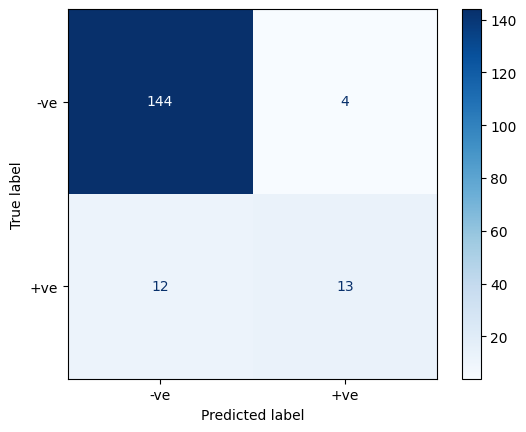

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
prediction = cv_classifier.predict(X_test)
cm=confusion_matrix(y_test, prediction)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["-ve", "+ve"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
accuracy_score(y_test,prediction)

0.9075144508670521

In [29]:
# performance of the model
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       148
           1       0.76      0.52      0.62        25

    accuracy                           0.91       173
   macro avg       0.84      0.75      0.78       173
weighted avg       0.90      0.91      0.90       173



accuracy score :0.908 
recall score :0.520     percesion score : 0.765
f1 score :0.619 


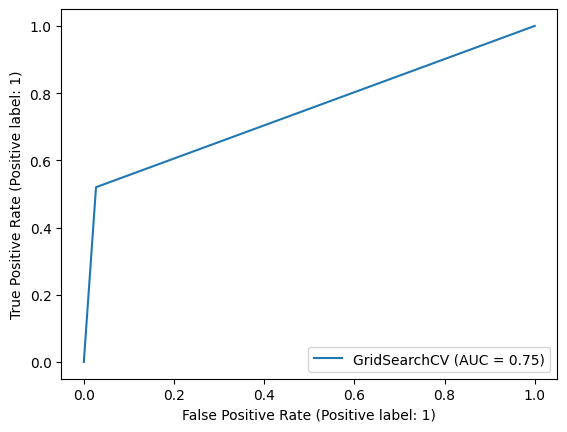

In [30]:
k_score = scoresmet(prediction)
a ,roc_k_grid =rocgraph(cv_classifier)
k_score += [a]
comp['KNN'] = k_score

In [ ]:
decision_boundary(cv_classifier)

# logistic regression

### using k-folds cross validation

In [31]:
from sklearn.linear_model import LogisticRegression

best recall :  1.0
avg rec :  0.9405797101449276


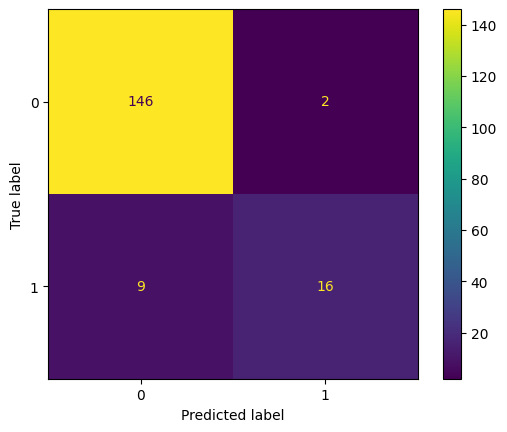

In [32]:
kf = KFold(n_splits=10)
best_model_k = None
best_rec = 0.0
recs=[]
for tr_idx ,test_idx in kf.split(X_train) :

    xtr,xte=X_train[tr_idx],X_train[test_idx]
    ytr,yte=y_train[tr_idx],y_train[test_idx]

    classifier_k = LogisticRegression()
    classifier_k.fit(xtr,ytr)

    y_hat = classifier_k.predict(xte)
    
    recs+=[accuracy_score(y_pred=y_hat,y_true=yte)]
    if recs[-1] > best_rec :
        best_rec = recs[-1]
        best_model_k = classifier_k
print("best recall : ", best_rec)
print("avg rec : ", np.mean(recs))
best_model_k.fit(X_train, y_train)
y_hat = best_model_k.predict(X_test)
confmat(y_hat)


accuracy score :0.936 
recall score :0.640     percesion score : 0.889
f1 score :0.744 


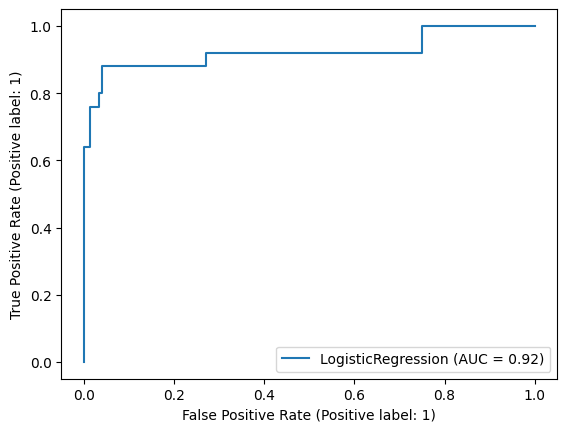

In [33]:
complog={}
a ,roc_lr_k= rocgraph(best_model_k)
KFold_LR_scores = scoresmet(y_hat)
KFold_LR_scores += [a]
complog['logistic regression k']=KFold_LR_scores

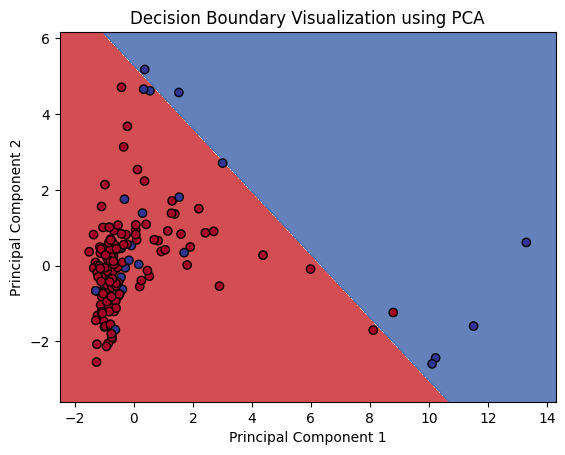

In [34]:
decision_boundary(best_model_k)

### using GridSearch to find the best paramters to pass into the object creation

### for params we will use : 
 - C : it's the hyperparamter to comprimise the defintion in they API is :
 > Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization 
  - we already used standrization so we will check if it needs to be multiblied by a number so we will start at 1 to 10000


In [35]:
param_grid = {
    'C': [1,10,100,1000,1000],

}
best_model = LogisticRegression()
grid_search = GridSearchCV(best_model, param_grid, verbose = 1, cv=10,scoring='accuracy')


# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = list(grid_search.best_params_.values())
print(best_params)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[10]


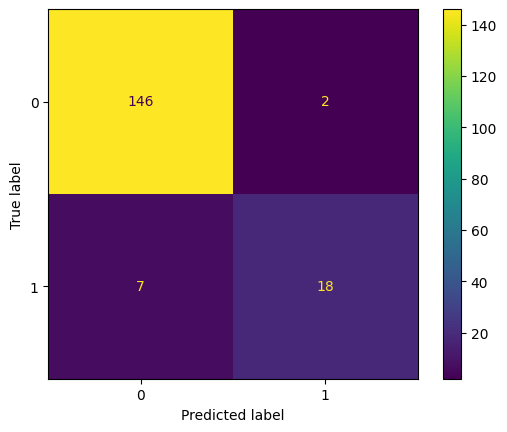

In [36]:
best_model_grid=LogisticRegression(C=best_params[0])
best_model_grid.fit(X_train, y_train)
y_hat = best_model_grid.predict(X_test)
confmat(y_hat)

accuracy score :0.948 
recall score :0.720     percesion score : 0.900
f1 score :0.800 


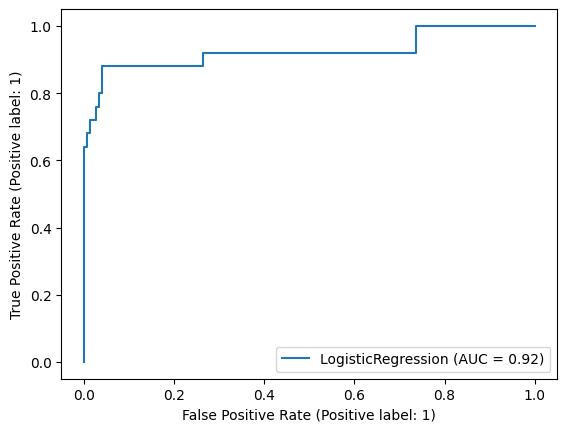

In [37]:
a ,roc_lr_grid = rocgraph(best_model_grid)
grid_LR_scores = scoresmet(y_hat)
grid_LR_scores += [a]
complog['logistic regression grid']=grid_LR_scores

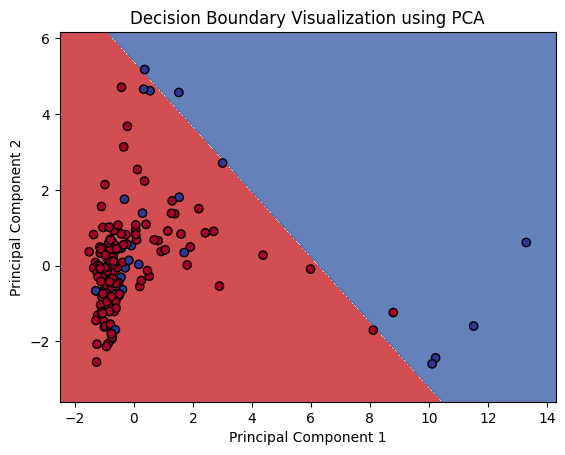

In [38]:
decision_boundary(best_model_grid)

#### mini summary for choosing the better

In [39]:
res_df = pd.DataFrame.from_dict(complog)
res_df.index = score_idx

In [40]:
res_df.head(5)

,logistic regression k,logistic regression grid
acc,0.936416,0.947977
recall,0.640000,0.720000
percision,0.888889,0.900000
f1 score,0.744186,0.800000
AUC,0.922973,0.924054


In [41]:
comp['Logistic Regression']=grid_LR_scores

In [42]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       148
           1       0.90      0.72      0.80        25

    accuracy                           0.95       173
   macro avg       0.93      0.85      0.89       173
weighted avg       0.95      0.95      0.95       173



# Naive Bayes

#### as naive bayes already have low accuracy as it deal like thre's nothimg dependant on the other we will use accuracy in scoring the model

In [43]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()

best accuracy :  0.8840579710144928
avg accuracy :  0.33043478260869563


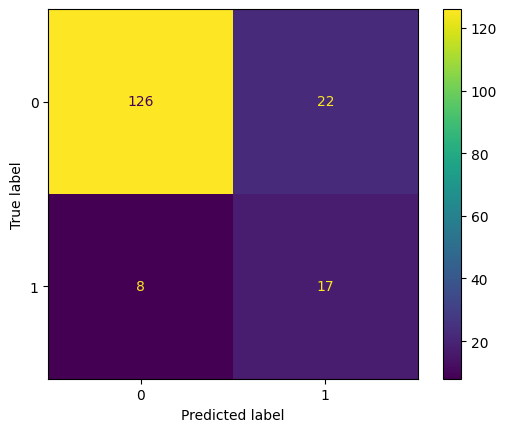

In [44]:
kf = KFold(n_splits=10,shuffle=True,random_state=0)
best_model_knb = None
best_rec = 0.0
recs=[]
for tr_idx ,test_idx in kf.split(X_train) :
    xtr,xte=X_train[tr_idx],X_train[test_idx]
    ytr,yte=y_train[tr_idx],y_train[test_idx]

    classifier_k = GaussianNB()

    classifier_k.fit(xtr,ytr)

    y_hat = classifier_k.predict(xte)

    acc = accuracy_score(y_pred=y_hat,y_true=yte)
    recs+=[acc]

    if acc > best_rec :
        best_rec = acc
        best_model_knb = classifier_k
        
print("best accuracy : ", best_rec)
print("avg accuracy : ", np.mean(recs))
y_hat = best_model_knb.predict(X_test)
confmat(y_hat)

accuracy score :0.827 
recall score :0.680     percesion score : 0.436
f1 score :0.531 


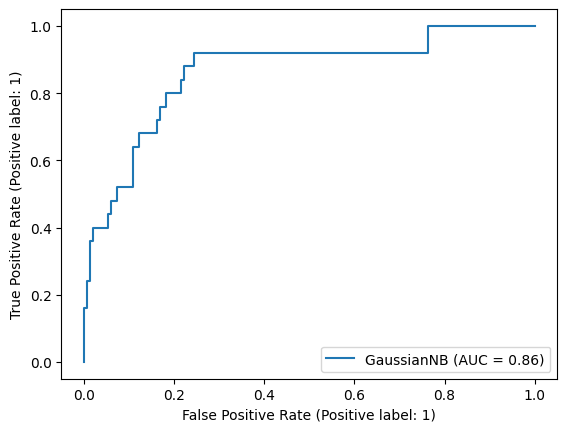

In [45]:
compnb = {}
a ,roc_nb_k= rocgraph(best_model_knb)
KFold_NB_scores = scoresmet(y_hat)
KFold_NB_scores += [a]
compnb['Naive Bayes k'] = KFold_NB_scores

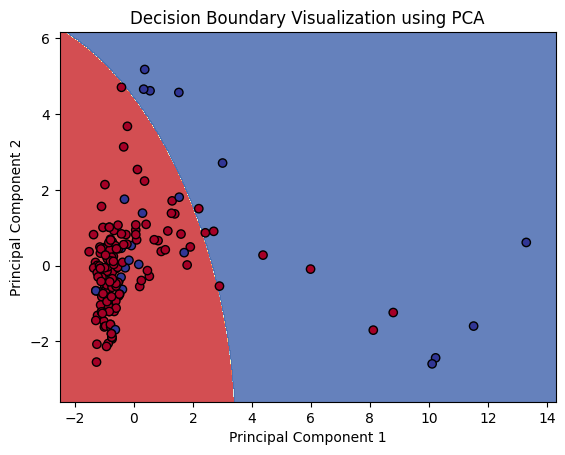

In [46]:
decision_boundary(best_model_knb)

### we will use grid search to find paramters to pass to the GuassianNB() function so we would get a better model

#### we don't know the prior prob so we can't use it but we can smooth the curve 
 - its default is 1e-9
 - we will search for a number on a logscale for it  from 0 == 1 and -9 == 1e-9 which is the default
 

In [47]:
best_model_gridnb=GaussianNB()

#the hyperparameters to search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search = GridSearchCV(best_model_gridnb, param_grid, cv=10, scoring='accuracy', verbose=1)

# Fitting the model to the training data
grid_search.fit(X_train, y_train)

best_params = list(grid_search.best_params_.values())
print(best_params)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[0.533669923120631]


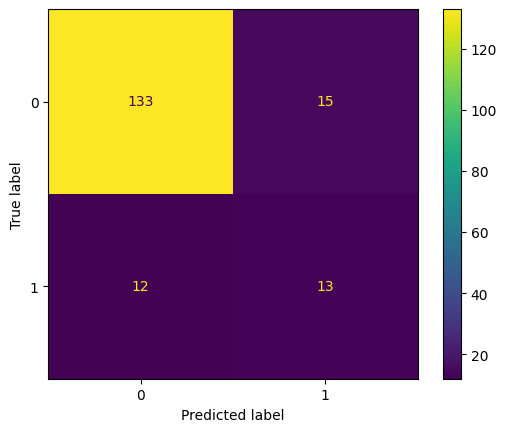

In [48]:
best_model_gridnb = GaussianNB(var_smoothing=best_params[0])
best_model_gridnb.fit(X_train,y_train)
y_hat = best_model_gridnb.predict(X_test)
confmat(y_hat)

accuracy score :0.844 
recall score :0.520     percesion score : 0.464
f1 score :0.491 


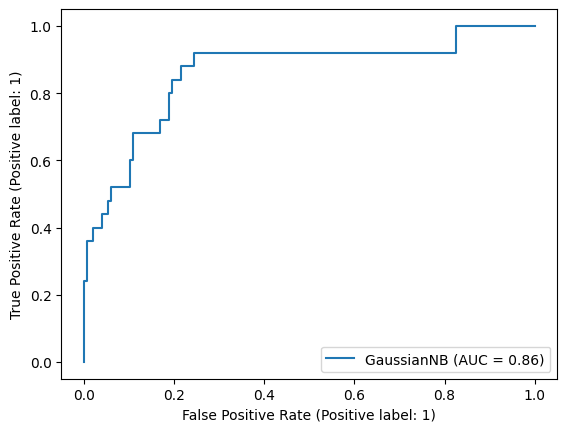

In [49]:
a ,roc_nb_grid= rocgraph(best_model_gridnb)
grid_NB_scores = scoresmet(y_hat)
grid_NB_scores +=[a]

compnb['Naive Bayes grid'] = grid_NB_scores

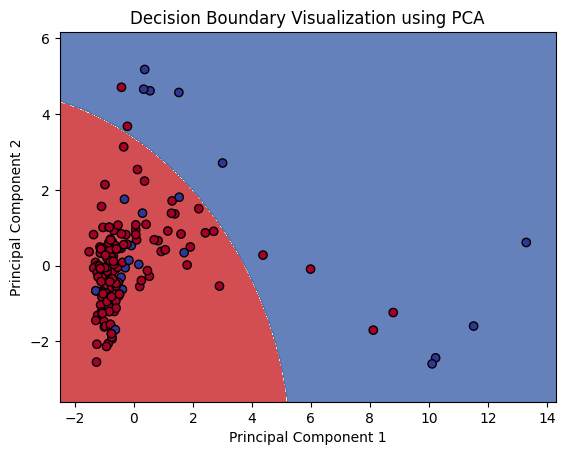

In [50]:
decision_boundary(best_model_gridnb)

#### mini summary for choosing the better model

In [51]:
res_df = pd.DataFrame.from_dict(compnb)
res_df.index = score_idx

In [52]:
res_df.head(5)

,Naive Bayes k,Naive Bayes grid
acc,0.826590,0.843931
recall,0.680000,0.520000
percision,0.435897,0.464286
f1 score,0.531250,0.490566
AUC,0.862703,0.861351


### it can be seen that k folds have higher auc but lower accuracy but we favor auc to accuracy so we will be taking k folds model

In [53]:
comp['Naive Bayes']=KFold_NB_scores

In [54]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       148
           1       0.46      0.52      0.49        25

    accuracy                           0.84       173
   macro avg       0.69      0.71      0.70       173
weighted avg       0.85      0.84      0.85       173



# summary

In [55]:
res_df = pd.DataFrame.from_dict(comp)
res_df.index = score_idx

In [56]:
res_df

,KNN,Logistic Regression,Naive Bayes
acc,0.907514,0.947977,0.826590
recall,0.520000,0.720000,0.680000
percision,0.764706,0.900000,0.435897
f1 score,0.619048,0.800000,0.531250
AUC,0.746486,0.924054,0.862703


In [57]:
display(res_df.to_string)

<bound method DataFrame.to_string of                 KNN  Logistic Regression  Naive Bayes
acc        0.907514             0.947977     0.826590
recall     0.520000             0.720000     0.680000
percision  0.764706             0.900000     0.435897
f1 score   0.619048             0.800000     0.531250
AUC        0.746486             0.924054     0.862703>

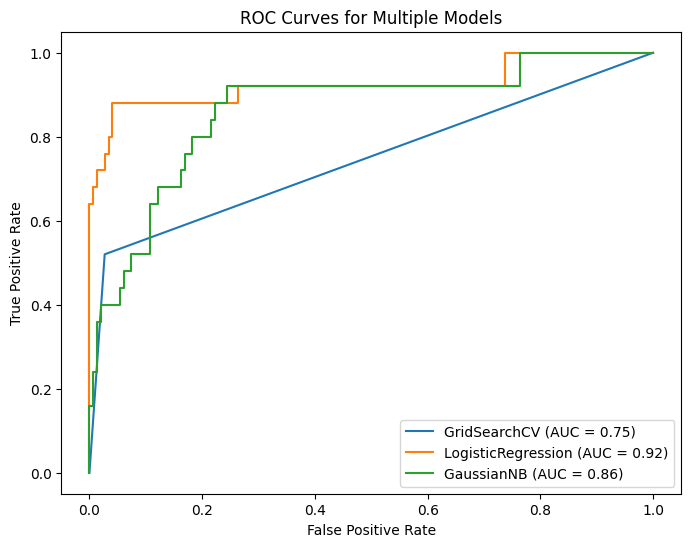

In [58]:
plt.figure(figsize=(8, 6))
roc_k_grid.plot(ax=plt.gca())
roc_lr_grid.plot(ax=plt.gca())
roc_nb_k.plot(ax=plt.gca())
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend()
plt.show()

# From those score and graphs we can concloude that highest scores is in logestic regression with : 
 - accuracy almost 95%
 - AUC 92%
 - F1 score 80%